Open University Learning Analytics Dataset (OULAD). It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

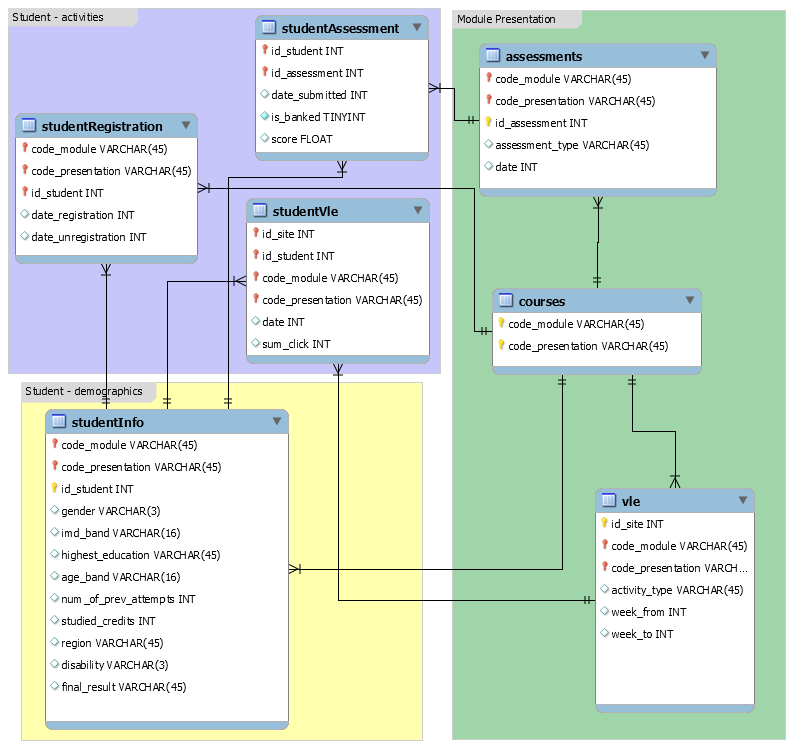

In [1]:
from IPython.display import Image #Database Schema
Image('schema.png')

##Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

##Loading files

In [3]:
df_assessments = pd.read_csv('assessments.csv')
df_courses = pd.read_csv('courses.csv')
df_st_assessment = pd.read_csv('studentAssessment.csv')
df_st_info = pd.read_csv('studentInfo.csv')
df_st_regist = pd.read_csv('studentRegistration.csv')
df_vle = pd.read_csv('vle.csv')
df_st_vle = pd.read_csv('studentVle.csv')

##Recognising DB

In [4]:
def show_basic_info(df):
    print("========================================================================================================")
    print("HEAD:")
    print(df.head(3))
    print("--------------------------------------------------------------------------------------------------------")
    print("SHAPE:")
    print(df.shape)
    print("--------------------------------------------------------------------------------------------------------")
    print("INFO:")
    print(df.info())
    print("--------------------------------------------------------------------------------------------------------")
    print("DESCRIBE:")
    print(df.describe())
    print("--------------------------------------------------------------------------------------------------------")
    print("========================================================================================================")

This file contains information about **assessments** in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains columns:
* code_module – identification code of the module, to which the assessment 
belongs.
* code_presentation - identification code of the presentation, to which the assessment belongs.
* id_assessment – identification number of the assessment.
* assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
* weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.
If the information about the final exam date is missing, it is at the end of the last presentation week.

In [5]:
show_basic_info(df_assessments)

HEAD:
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(206, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weigh

File contains the list of all available modules and their presentations. The columns are:
* code_module – code name of the module, which serves as the identifier.
* code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* length - length of the module-presentation in days.
The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [6]:
show_basic_info(df_courses)

HEAD:
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
--------------------------------------------------------------------------------------------------------
SHAPE:
(22, 3)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None
---------------------------------------------------------------------------------

This file contains the results of **students’ assessments**. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:
* id_assessment – the identification number of the assessment.
* id_student – a unique identification number for the student.
* date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.
* is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.
* score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [7]:
show_basic_info(df_st_assessment)

HEAD:
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(173912, 5)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None
--------------------

This file contains demographic information about the students together with their results. File contains the following columns:
* code_module – an identification code for a module on which the student is registered.
* code_presentation - the identification code of the presentation during which the student is registered on the module.
* id_student – a unique identification number for the student.
* gender – the student’s gender.
* region – identifies the geographic region, where the student lived while taking the module-presentation.
* highest_education – highest student education level on entry to the module presentation. (A-Levels (Advanced Level qualifications) are a UK subject-based qualification for students aged 16 and above.)
* imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band – band of the student’s age.
* num_of_prev_attempts – the number times the student has attempted this module.
* studied_credits – the total number of credits for the modules the student is currently studying.
* disability – indicates whether the student has declared a disability.
* final_result – student’s final result in the module-presentation.

In [8]:
show_basic_info(df_st_info)

HEAD:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  
--------------------------------------------------------------------------------------------------------
SHAPE:
(32593, 12)
--------------------------------------------------------------------------------------------------------
INFO:
<

In [9]:
df_st_info['id_student'].nunique()

28785

In [10]:
df_st_info['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:
* code_module – an identification code for a module.
* code_presentation - the identification code of the presentation.
* id_student – a unique identification number for the student.
* date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

In [11]:
show_basic_info(df_st_regist)

HEAD:
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
--------------------------------------------------------------------------------------------------------
SHAPE:
(32593, 5)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-n

The studentVle.csv file contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:
* code_module – an identification code for a module.
* code_presentation - the identification code of the module presentation.
* id_student – a unique identification number for the student.
* id_site - an identification number for the VLE material.
* date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click – the number of times a student interacts with the material in that day.

In [12]:
show_basic_info(df_st_vle)

HEAD:
  code_module code_presentation  id_student   id_site  date  sum_click
0         AAA             2013J     28400.0  546652.0 -10.0        4.0
1         AAA             2013J     28400.0  546652.0 -10.0        1.0
2         AAA             2013J     28400.0  546652.0 -10.0        1.0
--------------------------------------------------------------------------------------------------------
SHAPE:
(10439133, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10439133 entries, 0 to 10439132
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   code_module        object 
 1   code_presentation  object 
 2   id_student         float64
 3   id_site            float64
 4   date               float64
 5   sum_click          float64
dtypes: float64(4), object(2)
memory usage: 477.9+ MB
None
--------------------------------------------

The csv file contains information about the available materials in the VLE. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The vle.csv file contains the following columns:
* id_site – an identification number of the material.
* code_module – an identification code for module.
* code_presentation - the identification code of presentation.
* activity_type – the role associated with the module material.
* week_from – the week from which the material is planned to be used.
* week_to – week until which the material is planned to be used.

In [13]:
show_basic_info(df_vle)

HEAD:
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
--------------------------------------------------------------------------------------------------------
SHAPE:
(6364, 6)
--------------------------------------------------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to       

##EDA

Creating a binary result for analysis

In [8]:
df_st_info['final_result_2'] = df_st_info['final_result'].apply(lambda x: 'Reprovado' if \
    (x == 'Withdrawn' or x == 'Fail') else 'Aprovado')

###Gender Analysis

Comparative by gender (M/F)

In [157]:
genero = df_st_info[['id_student', 'gender']].drop_duplicates().groupby('gender').\
    agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", 'id_student': 'Qtde'})

genero['Percentual'] = genero.apply(lambda x: round(100 * (x['Qtde'] / genero['Qtde'].sum()),2), axis=1)
    
fig = px.bar(genero, x='Genero', y='Percentual', \
    text='Percentual', color='Genero',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Gênero',
    xaxis_title="Gênero",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show()

In [16]:
genero

,Genero,Qtde,Percentual
0,F,13739,47.73
1,M,15046,52.27


Final result by gender

In [17]:
df = df_st_info.groupby(['gender', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Genero",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Gênero',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=700, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show()

Binary final result by gender

In [160]:
df = df_st_info.groupby(['gender', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text="Percentual", color="Genero",
            hover_data=['Percentual'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Gênero',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Gênero",
    width=400, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show()

**Gender Conclusions**:


*   male majority among students: Female 13739- 47.73% and Male 15046-	52.27% 
*   we can see a slight better female use in the final result, the female majority was approved unlike the men.




###Age Analysis

In [19]:
df_st_info['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)

Age distribution

In [20]:
idade = df_st_info[['age_band', 'id_student']].drop_duplicates().groupby('age_band').agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", 'id_student': 'Qtde'}).sort_values(by='Idade', ascending=True)

idade['Percentual'] = idade.apply(lambda x:  round(100 * (x['Qtde'] / idade['Qtde'].sum()),2), axis=1)

fig = px.bar(idade, x='Idade', y='Qtde', text='Percentual', color='Idade', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Idade',
    xaxis_title="Idade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Idade",
    width=800, 
    height=450,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show()

In [21]:
idade

,Idade,Qtde,Percentual
0,0-35,20178,69.92
1,35-55,8500,29.46
2,55<=,179,0.62


Final result by age group

In [22]:
df = df_st_info.groupby(['age_band', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] ==\
     x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Qtde", text="Percentual", color="Idade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Idade',
    xaxis_title="Ressultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Idade",
    width=700, 
    height=600,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

Binary final result by age group

In [161]:
df = df_st_info.groupby(['age_band', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text="Percentual", color="Idade",
            hover_data=['Percentual'], template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Idade',
    xaxis_title="Ressultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Idade",
    width=400, 
    height=600,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

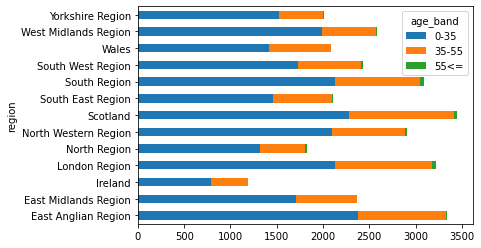

In [24]:
pd.crosstab(df_st_info.region, df_st_info.age_band).plot.barh(stacked = True);

**Age Conclusions**:


*   Quase 70% dos estudantes estão na faixa de até 35 anos, 29,4% tem entre 35 e 55 anos e o,6% mais de 55 anos de idade.
*   Podemos notar que o índice de reprovação é mais alto entre os mais jovens. Pessoas mais velhas dão mais valor ao estudo? Pagam pelo próprio estudo?



###Region Analysis

In [25]:
df_st_info['region'].nunique()

13

In [26]:
df_st_info['region'].unique()

array(['East Anglian Region', 'Scotland', 'North Western Region',
       'South East Region', 'West Midlands Region', 'Wales',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

In [162]:
regiao = df_st_info[['region', 'id_student']].drop_duplicates().groupby('region').agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", 'id_student': 'Qtde'}).sort_values(by='Qtde', ascending=False)

regiao['Percentual'] = regiao.apply(lambda x: round(100 * (x['Qtde'] / regiao['Qtde'].sum()), 2) ,axis=1)

fig = px.bar(regiao, x='Regiao', y='Qtde', text='Percentual', color ='Regiao',  template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Localidade',
    xaxis_title="Região",
    yaxis_title="Quantidade [Alunos]",
    showlegend=False,
    width=800, 
    height=500,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)

fig.show()

In [164]:
regiao

,Regiao,Qtde,Percentual
0,East Anglian Region,3000,10.42
6,Scotland,2934,10.19
3,London Region,2845,9.88
8,South Region,2737,9.51
5,North Western Region,2548,8.85
11,West Midlands Region,2269,7.88
9,South West Region,2154,7.48
1,East Midlands Region,2095,7.28
10,Wales,1876,6.52
7,South East Region,1875,6.51


In [28]:
df = df_st_info.groupby(['region', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Qtde", text="Percentual", color="Regiao",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Localidade',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Região",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

In [167]:
df = df_st_info.groupby(['region', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", color="Regiao",
            hover_data=['Percentual'], template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Localidade',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Região",
    width=400, 
    height=500,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig.show()

**Region Conclusions**:


*   As 4 maiores regiões e número de estudantes são East Anglican Region, Scotland, London e South Region. E a menos representativa é Ireland
*   Podemos notar que as regiões mais representativas também lideram entre os mais reprovados, salvo South region que teve um melhor índice de aprovação (vide inclinação oposta da reta)


###Education Analysis

In [30]:
df_st_info['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [168]:
escolaridade = df_st_info.groupby('highest_education').agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", 'id_student': 'Qtde'}).sort_values(by='Qtde', ascending=False)

escolaridade['Percentual'] = escolaridade.apply(lambda x: round(100 * (x['Qtde'] / escolaridade['Qtde'].sum()), 2) ,axis=1)

fig = px.bar(escolaridade, x='Escolaridade', y='Percentual', text='Qtde', color='Escolaridade', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=30),
    title = 'Distribuição - Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Percentual [Alunos]",
    legend_title="Escolaridade",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show()

In [32]:
escolaridade

,Escolaridade,Qtde,Percentual
0,A Level or Equivalent,14045,43.09
2,Lower Than A Level,13158,40.37
1,HE Qualification,4730,14.51
3,No Formal quals,347,1.06
4,Post Graduate Qualification,313,0.96


Podemos ver que mais de 80% dos estudantes tem até o "A Level" (Os A-levels são qualificações avançadas relacionadas à área de estudo que o estudante pretende cursar na universidade.) 14,5% possui HE Qualification (Equiparavel a Graduação). A minoria restante ou não tem qualificação formal ou tem Pós Graduação.

In [33]:
df = df_st_info.groupby(['highest_education', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Qtde", text='Percentual', color="Escolaridade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=30),
    title = 'Resultados por Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Escolaridade",
    width=800, 
    height=700,
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
)
 
fig.show()

In [174]:
df = df_st_info.groupby(['highest_education', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text='Percentual', color="Escolaridade",
            hover_data=['Percentual'], template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=30),
    title = 'Resultados por Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Escolaridade",
    width=450, 
    height=600,
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
)
 
fig.show()

**Education Conclusion**

*  Podemos ver que mais de 80% dos estudantes tem até o "A Level" (Os A-levels são qualificações avançadas relacionadas à área de estudo que o estudante pretende cursar na universidade.) 14,5% possui HE Qualification (Equiparavel a Graduação). A menoria restante ou não tem qualificação formal ou tem Pós Graduação.
*  Podemos dizer que quanto maior no nível de escolaridade melhor o desempenho dos alunos, visto que os que possuíam A Level ou HE tiveram maior indice de aprovação em relação aos que não concluíram o A Level.

###IMD_Band Analysis

In [35]:
df_st_info['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

Lidando com valores 'nan' - "imd_band" feature


*   Usando mode by region


In [4]:
df_st_info['imd_band_2'] = df_st_info.apply(lambda x: df_st_info[df_st_info['region']==x['region']]['imd_band'].mode()[0] \
    if pd.isna(x['imd_band']) else x['imd_band'], axis=1)

In [5]:
indice = df_st_info.groupby('imd_band').agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band": "Indice", 'id_student': 'Qtde'}).sort_values(by='Indice', ascending=True)

indice['Percentual'] = indice.apply(lambda x:  round(100 * (x['Qtde'] / indice['Qtde'].sum()),2), axis=1)

fig = px.bar(indice, x='Indice', y='Qtde', text='Percentual', color='Indice', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Indice IMD',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show()

In [6]:
indice = df_st_info.groupby('imd_band_2').agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band_2": "Indice", 'id_student': 'Qtde'}).sort_values(by='Indice', ascending=True)

indice['Percentual'] = indice.apply(lambda x:  round(100 * (x['Qtde'] / indice['Qtde'].sum()),2), axis=1)

fig = px.bar(indice, x='Indice', y='Qtde', text='Percentual', color='Indice', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Indice IMD',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show()

In [13]:
indice

,Indice,Qtde,Percentual
0,0-10%,3626,11.13
1,10-20,4247,13.03
2,20-30%,3654,11.21
3,30-40%,3544,10.87
4,40-50%,3256,9.99
5,50-60%,3136,9.62
6,60-70%,2905,8.91
7,70-80%,2879,8.83
8,80-90%,2762,8.47
9,90-100%,2584,7.93


In [39]:
df = df_st_info.groupby(['imd_band', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band": "Indice", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Qtde", text='Percentual', color="Indice",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Indice - IMD',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

In [12]:
df = df_st_info.groupby(['imd_band_2', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band_2": "Indice", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text='Percentual', color="Indice",
            hover_data=['Percentual'], template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Índice',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=400, 
    height=500,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

**IMD** **Conclusions**

*  Podemos ver que a maior parte dos alunos vive em zonas com baixo IMD (ìndice de qualidade de vida da região).
*  Podemos ver a tendência nos dados, onde quanto maior o IMD maior o índice de aprovação

###Credits Analysis

In [41]:
df_st_info['studied_credits'].sort_values().unique()

array([ 30,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95,
       100, 105, 110, 115, 120, 130, 135, 140, 145, 150, 155, 160, 165,
       170, 175, 180, 190, 195, 200, 205, 210, 215, 220, 225, 235, 240,
       250, 255, 270, 280, 300, 310, 315, 325, 330, 345, 355, 360, 370,
       390, 400, 420, 430, 480, 540, 585, 630, 655])

In [42]:
df_st_info['studied_credits'].describe()

count    32593.000000
mean        79.758691
std         41.071900
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64

In [14]:
#criando faixas de creditos
df_st_info['cred_bin'] = df_st_info.apply(lambda x: '0 - 100' if x['studied_credits'] <= 100 else \
    ('100 - 200'if x['studied_credits'] > 100 and x['studied_credits'] <= 200 \
        else ('200 - 300'if x['studied_credits'] > 200 and x['studied_credits'] <= 300 \
            else ('300 - 400'if x['studied_credits'] > 300 and x['studied_credits'] <= 400 else '400+'))), axis=1)

In [20]:
cred = df_st_info.groupby('cred_bin').agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "Creditos", 'id_student': 'Qtde'}).sort_values(by='Creditos', ascending=True)


cred = cred.sort_values(by='Creditos')

fig = px.bar(cred, x='Qtde', y='Creditos', color='Creditos', text='Qtde', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Creditos Cursados',
    xaxis_title="Quantidade [Alunos]",
    yaxis_title="Créditos",
    legend_title="Intervalos de Créditos",
    width=500, 
    height=400,
    
)
fig.show()

In [21]:
cred

,Creditos,Qtde
0,0 - 100,23980
1,100 - 200,8092
2,200 - 300,486
3,300 - 400,28
4,400+,7


In [45]:
df = df_st_info.groupby(['cred_bin', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "FaixasCredito", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="FaixasCredito",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Créditos Cursados',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Intervalos de Créditos",
    width=800, 
    height=600,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

In [19]:
df = df_st_info.groupby(['cred_bin', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "FaixasCredito", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text="Percentual", color="FaixasCredito",
            hover_data=['Percentual'], template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Créditos Cursados',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Intervalos de Créditos",
    width=400, 
    height=400,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

**Cred Conclusions**

*  A grande maioria cursa até 100 créditos.
*  Há uma leve tendência de maior reprovação nos que cursam maior número de créditos.

###Disability Analysis

In [25]:
defci = df_st_info[['disability', 'id_student']].drop_duplicates().groupby('disability').agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", 'id_student': 'Qtde'}).sort_values(by='Deficiencia', ascending=True)

defci['Percentual'] = defci.apply(lambda x:  round(100 * (x['Qtde'] / defci['Qtde'].sum()),2), axis=1)

fig = px.bar(defci, x='Deficiencia', y='Qtde', text='Percentual', template="seaborn", color='Deficiencia')
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Deficiencia',
    xaxis_title="Deficiência",
    yaxis_title="Quantidades [Alunos]",
    legend_title="Deficiência",
    width=400, 
    height=450,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show()

In [26]:
defci

,Deficiencia,Qtde,Percentual
0,N,26068,90.56
1,Y,2717,9.44


In [24]:
df = df_st_info.groupby(['disability', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", color="Deficiencia", text='Percentual',
            hover_data=['Percentual'], template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Deficiencia',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Deficiência",
    width=400, 
    height=400,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

**Disability Conclusions**
*  Menos de 10% dos estudantes possuem deficiência
*  Deficiência não parece ter ligação direta com desempenho

###Module Analysis

In [49]:
df_st_info['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [27]:
modulo = df_st_info.groupby('code_module').agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_module": "Modulo", 'id_student': 'Qtde'})

modulo['Percentual'] = modulo.apply(lambda x: round(100 * (x['Qtde'] / modulo['Qtde'].sum()),2), axis=1)
    
fig = px.bar(modulo, x='Modulo', y='Qtde', \
    text='Percentual', color='Modulo',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Módulo Cursado',
    xaxis_title="Módulo Cursado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Módulo Cursado",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig

In [28]:
modulo

,Modulo,Qtde,Percentual
0,AAA,748,2.29
1,BBB,7909,24.27
2,CCC,4434,13.60
3,DDD,6272,19.24
4,EEE,2934,9.00
5,FFF,7762,23.81
6,GGG,2534,7.77


In [31]:
df = df_st_info.groupby(['code_module', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_module": "Modulo", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text="Percentual", color="Modulo",
            hover_data=['Percentual'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Módulo Cursado',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Módulo Cursado",
    width=400, 
    height=450,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig

**Module Conclusions**
*  Cursos mais cursados são BBB, FFF e DDD respectivamente. E o menos cursado é AAA seguido de GGG
*  Os cursos mais cursados parecem ter um índice de reprovação maior.

###Course presentation Analysis

In [32]:
periodo = df_st_info.groupby('code_presentation').agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_presentation": "Periodo", 'id_student': 'Qtde'})

periodo['Percentual'] = periodo.apply(lambda x: round(100 * (x['Qtde'] / periodo['Qtde'].sum()),2), axis=1)
    
fig = px.bar(periodo, x='Periodo', y='Qtde', \
    text='Percentual', color='Periodo',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Período Cursado',
    xaxis_title="Período Cursado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Período Cursado",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show()

In [33]:
periodo

,Periodo,Qtde,Percentual
0,2013B,4684,14.37
1,2013J,8845,27.14
2,2014B,7804,23.94
3,2014J,11260,34.55


In [34]:
df = df_st_info.groupby(['code_presentation', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"code_presentation": "Periodo", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text="Percentual", color="Periodo",
            hover_data=['Percentual'], template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Período Cursado',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Período Cursado",
    width=400, 
    height=400,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show()

**Presentation Conclusions**
*  A maioria dos alunos começa em outubro (J) e a menoria em fevereiro (B)
*  Alunos que iniciaram em fevereiro tiveram maior indice de reprovação

###Prev attempts analysis

In [54]:
df_st_info['num_of_prev_attempts'].unique()

array([0, 1, 2, 4, 3, 5, 6])

In [38]:
tentat = df_st_info.groupby('num_of_prev_attempts').agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", 'id_student': 'Qtde'}).sort_values(by='Tentativas', ascending=True)

tentat['Percentual'] = tentat.apply(lambda x:  round(100 * (x['Qtde'] / tentat['Qtde'].sum()),2), axis=1)

fig = px.bar(tentat, x='Tentativas', y='Qtde', text='Percentual', color='Tentativas', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Tentativas Anteriores',
    xaxis_title="Tentativas",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=600, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show()

In [36]:
tentat

,Tentativas,Qtde,Percentual
0,0,28421,87.20
1,1,3299,10.12
2,2,675,2.07
3,3,142,0.44
4,4,39,0.12
5,5,13,0.04
6,6,4,0.01


In [37]:
df = df_st_info.groupby(['num_of_prev_attempts', 'final_result_2']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", "final_result_2": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.line(df, x="Resultado", y="Qtde", text="Percentual", color="Tentativas",
            hover_data=['Percentual'])

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=400, 
    height=450,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

In [40]:
fig = px.line(df[df['Tentativas'] != 0], x="Resultado", y="Qtde", text="Percentual", color="Tentativas",
            hover_data=['Percentual'])

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tent. Anterior - A partir de uma tentativa',
    xaxis_title="Resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=450, 
    height=400,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)

fig.show()

**Prev Attempts Conclusions**
*  Mais de 87% não fez tentativas anteriores, cerca de 10% fizeram 1.
*  Os que fizeram 1 tentativa anterior tiveram maior indice de reprovação

###Student's activities analysis

In [58]:
df_st_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10439133 entries, 0 to 10439132
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   code_module        object 
 1   code_presentation  object 
 2   id_student         float64
 3   id_site            float64
 4   date               float64
 5   sum_click          float64
dtypes: float64(4), object(2)
memory usage: 477.9+ MB


In [59]:
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [41]:
#join df_st_vle(all features) and df_vle(activity_type)
studentvle_vle = df_st_vle.merge(df_vle[['id_site', 'activity_type']], on='id_site', how='left')

In [42]:
studentvle_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent


Juntando dados de interação dos alunos com resultado final.

In [43]:
click_finalresult = df_st_info.merge(studentvle_vle, on=['id_student','code_module', 'code_presentation'], how='left')

In [44]:
click_finalresult = click_finalresult[['final_result_2', 'sum_click', 'activity_type']]

In [45]:
click_finalresult = click_finalresult.groupby(['activity_type', 'final_result_2']).agg({'sum_click':'sum'}).reset_index()

In [46]:
click_finalresult.head()

,activity_type,final_result_2,sum_click
0,dataplus,Aprovado,1904.0
1,dataplus,Reprovado,250.0
2,forumng,Aprovado,211527.0
3,forumng,Reprovado,38360.0
4,glossary,Aprovado,374.0


Gráfico de interação (clicks) dos alunos com o material didático virtual (VLE) e resultado final

In [47]:
fig = px.histogram(click_finalresult, x="activity_type", y="sum_click",
             color='final_result_2', barmode='group')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Clicks por material didático e aprovação',
    xaxis_title="Material didático (VLE)",
    yaxis_title="Nº de clicks",
    width=900, 
    height=450,
    uniformtext_minsize=9, 
    uniformtext_mode='hide')

fig.show()

Podemos ver no gráfico que os canais do VLE mais utilizados estão diretamente ligados ao índice de aprovação, visto que os canais que tem maior número de clicks tem um índice de aprovação muito alto.

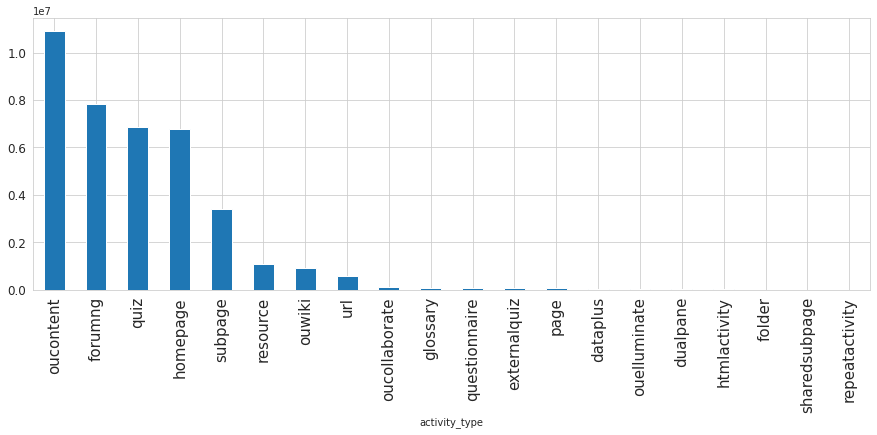

In [69]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
studentvle_vle.groupby(['activity_type'], as_index=True)['sum_click'].sum().sort_values(ascending=False).plot(kind='bar')

Podemos ver os meios mais acessados pelos alunos no VLE.

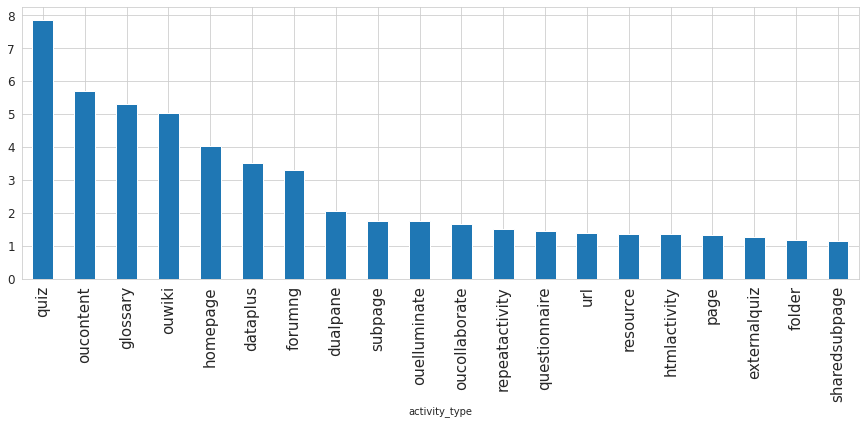

In [74]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
studentvle_vle.groupby(['activity_type'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')

Neste plot podemos ver a interação média dos alunos, para vermos não só o que mais eles acessam e também o que mais retém a atenção no VLE. E faz sentido, visto que geralmente os alunos gastam mais clicks nos quizes.

In [62]:
#group with sum (activity_type)
aux = studentvle_vle.groupby(['id_student', 'code_module', 'code_presentation',\
     'activity_type'])['sum_click'].sum().unstack().fillna(0).reset_index()

In [63]:
#join
df = df_st_info.merge(aux, on=['id_student','code_module', 'code_presentation'], how='left')

#fillna only required fields
df[['dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']] = \
              df[['dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']].fillna(0)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              31482 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  final_result          32593 non-null  object 
 12  final_result_2        32593 non-null  object 
 13  imd_band_2            32593 non-null  object 
 14  cred_bin              32593 non-null  object 
 15  dataplus           

In [65]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'final_result_2',
       'imd_band_2', 'cred_bin', 'dataplus', 'dualpane', 'externalquiz',
       'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity',
       'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page',
       'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage',
       'subpage', 'url'],
      dtype='object')

In [75]:
assessments_group = df_st_assessment.merge(df_assessments[['id_assessment', 'weight']], on='id_assessment', how='left')
assessments_group = assessments_group.merge(df_st_info[['id_student', 'code_module', 'code_presentation',\
    'final_result']], on='id_student', how='left')

In [76]:
assessments_group['nota'] = (assessments_group['score']/100) * assessments_group['weight']

###Featuring

https://iaexpert.academy/2020/07/14/selecao-de-atributos-com-extra-trees-classifier/

Importando bibliotecas de Machine Learning

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder #Basicamente o que esse utilitário faz é converter os valores categórios em valores numéricos.
from sklearn.preprocessing import MinMaxScaler

In [79]:
#removendo % dos valores
df['imd_band'] = df['imd_band'].astype(str)
df['imd_band'] = df['imd_band'].apply(lambda x: x.split('%')[0])
df['imd_band_2'] = df['imd_band_2'].astype(str)
df['imd_band_2'] = df['imd_band_2'].apply(lambda x: x.split('%')[0])

In [81]:
LE = LabelEncoder() #converter os valores categórios em valores numéricos.

In [85]:
st_info_final = df.copy()

colunas = ['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'imd_band_2', 'age_band', 'cred_bin', 'disability', 'final_result', 'final_result_2'] #colunas não numéricas

#convertendo para valores numéricos
for col in colunas:
    st_info_final[col] = LE.fit_transform(st_info_final[col])

In [86]:
st_info_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  int64  
 1   code_presentation     32593 non-null  int64  
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  int64  
 4   region                32593 non-null  int64  
 5   highest_education     32593 non-null  int64  
 6   imd_band              32593 non-null  int64  
 7   age_band              32593 non-null  int64  
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  int64  
 11  final_result          32593 non-null  int64  
 12  final_result_2        32593 non-null  int64  
 13  imd_band_2            32593 non-null  int64  
 14  cred_bin              32593 non-null  int64  
 15  dataplus           

In [102]:
X = st_info_final[['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band_2', 'age_band', 'num_of_prev_attempts', 'disability', 'cred_bin']]

X_ = st_info_final[['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band_2', 'age_band', 'num_of_prev_attempts',
       'disability', 'cred_bin', 'dataplus', 'dualpane', 'externalquiz', 'folder',
       'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']]

Y = st_info_final[['final_result']]
Y_ = st_info_final[['final_result_2']]

####Features analysis

In [103]:
selection = ExtraTreesClassifier()
selection.fit(X,Y_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesClassifier()

In [104]:
feature_list = list(['code_module', 'code_presentation', 'gender', 'region', 'highest_education',
'imd_band_2', 'age_band', 'num_of_prev_attempts', 'disability', 'cred_bin'])

In [105]:
importances = list(selection.feature_importances_)

feature_importances = [(feature, round(importance * 100, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Feature: region               Importance: 35.01
Feature: imd_band_2           Importance: 19.2
Feature: code_module          Importance: 12.36
Feature: code_presentation    Importance: 10.3
Feature: highest_education    Importance: 7.58
Feature: num_of_prev_attempts Importance: 4.53
Feature: cred_bin             Importance: 4.36
Feature: age_band             Importance: 2.77
Feature: gender               Importance: 2.58
Feature: disability           Importance: 1.3


[None, None, None, None, None, None, None, None, None, None]

In [106]:
feat01 = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

In [107]:
fig = px.bar(feat01, x="Importance", y="Feature", color="Feature", text='Importance', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Feature Importance - Teste 01',
    showlegend=False,
    xaxis_title="Importancia [%]",
    yaxis_title="Variável",
    legend_title="Deficiência",
    width=400, 
    height=450,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig.show()

####All Features analysis

In [108]:
selection = ExtraTreesClassifier()
selection.fit(X_,Y_)

importances = selection.feature_importances_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [109]:
feature_list = list(['code_module', 'code_presentation', 'gender', 'region',
'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
'disability', 'cred_bin', 'dataplus', 'dualpane', 
'externalquiz', 'folder', 'forumng', 'glossary', 
'homepage', 'htmlactivity', 'oucollaborate','oucontent', 
'ouelluminate', 'ouwiki', 'page', 'questionnaire', 
'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 
'subpage', 'url'])

In [116]:
importances = list(selection.feature_importances_)

feature_importances = [(feature, round(importance * 100, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:15]]

Feature: homepage             Importance: 11.2
Feature: oucontent            Importance: 8.65
Feature: quiz                 Importance: 8.26
Feature: subpage              Importance: 7.95
Feature: forumng              Importance: 6.2
Feature: code_module          Importance: 6.03
Feature: resource             Importance: 5.65
Feature: url                  Importance: 5.58
Feature: ouwiki               Importance: 4.45
Feature: region               Importance: 3.66
Feature: imd_band             Importance: 3.56
Feature: oucollaborate        Importance: 3.53
Feature: code_presentation    Importance: 2.97
Feature: highest_education    Importance: 2.43
Feature: questionnaire        Importance: 2.3


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [117]:
feat02 = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

In [118]:
fig = px.bar(feat02, x="Importance", y="Feature", color="Feature", text='Importance', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Feature Importance - Teste 02',
    showlegend=False,
    xaxis_title="Importancia [%]",
    yaxis_title="Variável",
    legend_title="Deficiência",
    width=800, 
    height=800,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show()

In [119]:
X_new = X_.copy()

In [120]:
x_train_new, x_test_new, y_train, y_test = train_test_split(X_new, Y_, test_size=0.2, random_state=0)
model1_2 = ExtraTreesClassifier()
model1_2.fit(x_train_new, y_train)
predictions_2 = model1_2.predict(x_test_new)
accuracy_score(y_test, predictions_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8605614358030372

####Decisiontree

In [ ]:
"""target_name = 'final_result_2'
X = st_info_final.drop(['final_result_2', 'final_result'], axis=1)
y = st_info_final[target_name]"""

In [ ]:
#scaler = MinMaxScaler() #Normalização de dados (de 0 a 1 com proporção)

In [ ]:
#X = scaler.fit_transform(X)

In [ ]:
"""#20% para teste do modelo
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y  #mantém balanceamento entre as classes (final_result_2 1 e 0) na separação dos dados
)

In [ ]:
"""dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [ ]:
"""importances = dtree.feature_importances_
feat_names = st_info_final.drop(['final_result_2'],axis=1).columns

In [ ]:
"""indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()